In [2]:
import pandas as pd
import pickle
import shap

from sm_utils import load_model

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## load data

In [7]:
x_test = pd.read_pickle('../data/x_test.pkl')
y_test = pd.read_pickle('../data/y_test.pkl')

In [9]:
x_test.shape, y_test.shape

((3635243, 79), (3635243, 1))

In [13]:
df_meta = pd.read_csv('../data/column_meta.csv')

In [16]:
xgb_dict = load_model('../result/model_selection/xgb_result_0703.pkl')
lgb_dict = load_model('../result/model_selection/lgb_result_0703.pkl')

load model from  ../result/model_selection/xgb_result_0703.pkl
load model from  ../result/model_selection/lgb_result_0703.pkl


In [17]:
xgb_dict.keys()

dict_keys(['result', 'metrics', 'confusion_matrix', 'feature_importance'])

In [23]:
xgb_result = xgb_dict['result']
xgb_result.columns = ['y_true', 'xgb_pred', 'xgb_pred_class']

lgb_result = lgb_dict['result']
lgb_result.columns = ['y_true', 'lgb_pred', 'lgb_pred_class']
lgb_result.drop('y_true', axis=1, inplace=True)

In [27]:
x_test.shape

(3635243, 79)

In [28]:
xgb_result.shape

(3635243, 3)

In [32]:
x_test.reset_index(inplace=True)

In [35]:
df_result = pd.concat([x_test, xgb_result, lgb_result], axis=1)

In [36]:
df_result.columns

Index(['index', 'sex_cd', 'age', 'svc_gr', 'mng_nice_cb_scr',
       'mng_nice_cb_grd', 'svc_scrb_period', 'last_equip_period',
       'bas_fee_amt', 'bas_ofr_data_gb', 'eqp_out_prc', 'allot_prn_amt',
       'pmth_inv_bamt', 'family_yn', 'family_small_yn', 'twld_visit_cnt_bf_m0',
       'twld_visit_cnt_bf_m1', 'twld_visit_cnt_bf_m2', 'avg_twld_visit_cnt',
       'twld_fee_visit_cnt_bf_m0', 'twld_fee_visit_cnt_bf_m1',
       'twld_fee_visit_cnt_bf_m2', 'avg_twld_fee_visit_cnt', 'ansim_yn',
       'ref_data_usage_in_gb_bf_m0', 'ref_data_usage_in_gb_bf_m1',
       'ref_data_usage_in_gb_bf_m2', 'data_usage_in_gb_bf_m0',
       'data_usage_in_gb_bf_m1', 'data_usage_in_gb_bf_m2',
       'avg_data_usage_in_gb', 'overage_bf0', 'overage_bf1', 'overage_bf2',
       'copn_data_u1_yn_bf_m0', 'copn_data_u1_yn_bf_m1',
       'copn_data_u1_yn_bf_m2', 'data_gift_send_yn_bf_m0',
       'data_gift_send_yn_bf_m1', 'data_gift_send_yn_bf_m2',
       'data_gift_recv_yn_bf_m0', 'data_gift_recv_yn_bf_m1',
   

In [53]:
df_result[['sec_dev_yn', 'y_true']].groupby(['sec_dev_yn', 'y_true']).size()

sec_dev_yn  y_true
0           0         3414105
            1           65819
1           0          153915
            1            1404
dtype: int64

In [55]:
1404/153915

0.00912191794172108

In [54]:
65819/ 3414105

0.01927855177271935

In [58]:
percentage = lambda i: len(i) / float(len(x)) * 100

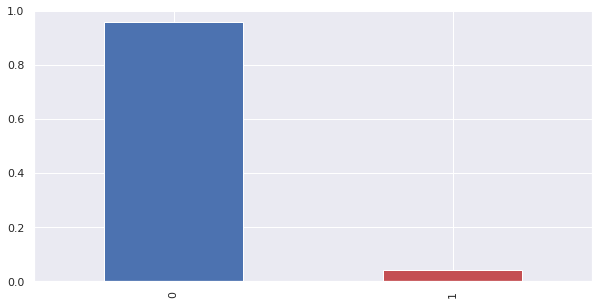

In [62]:
df_result['sec_dev_yn'].value_counts(normalize=True, sort=False).plot(kind='bar', color=['b', 'r'])

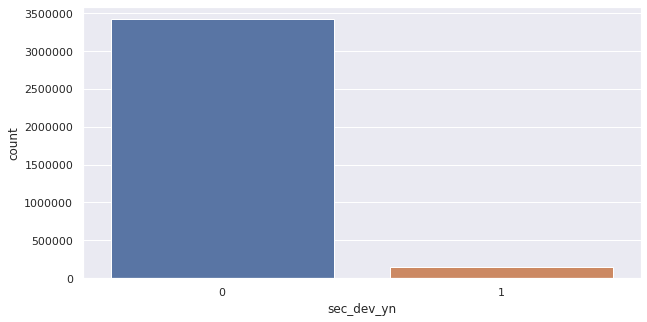

In [64]:
sns.countplot(data=df_result[df_result.y_true==0], x='sec_dev_yn' )

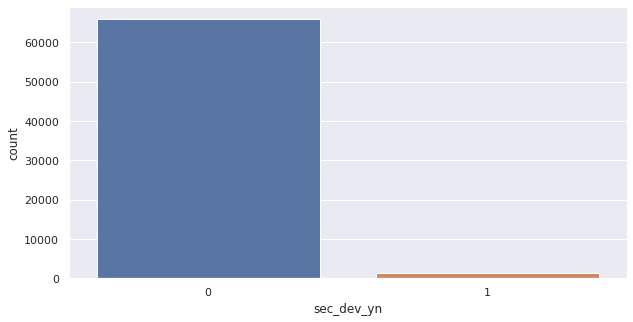

In [63]:
sns.countplot(data=df_result[df_result.y_true==1], x='sec_dev_yn' )

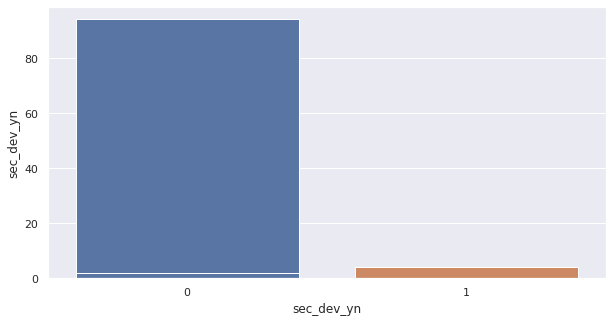

In [68]:
sns.barplot(x='sec_dev_yn', y='sec_dev_yn', data=df_result[df_result['y_true']==0], estimator=lambda x: len(x) / len(df_result) *100)
sns.barplot(x='sec_dev_yn', y='sec_dev_yn', data=df_result[df_result['y_true']==1], estimator=lambda x: len(x) / len(df_result) *100)

In [69]:
props = df_result.groupby('sec_dev_yn')['y_true'].value_counts(normalize=True).unstack()

In [70]:
props

y_true             0         1
sec_dev_yn                    
0           0.981086  0.018914
1           0.990961  0.009039

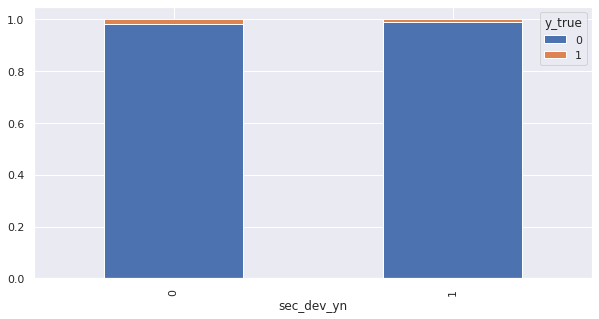

In [71]:
props.plot(kind='bar', stacked='True')

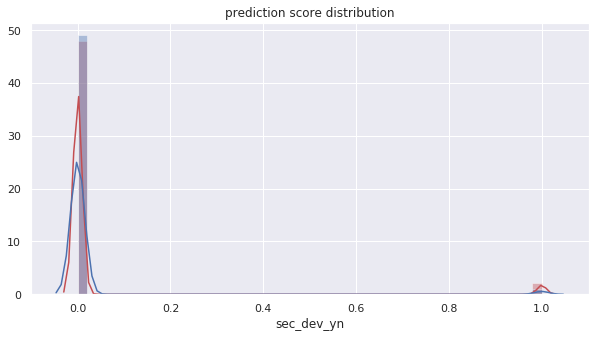

In [41]:
# prediction score distribution ----------
sns.set(rc={'figure.figsize': (10,5)})
plt.title('prediction score distribution')

sns.distplot(df_result[df_result.y_true==0].sec_dev_yn, norm_hist=True, color='r', label='true: 0')
sns.distplot(df_result[df_result.y_true==1].sec_dev_yn, norm_hist=True, label='true: 1')
plt.show()

In [40]:
xgb_dict['feature_importance'].sort_values('importance', ascending=False)

feature  importance
42                  sec_dev_yn    0.060281
12                   family_yn    0.044345
8              bas_ofr_data_gb    0.042611
56   bf_m3_data_over_usage_cnt    0.042249
6            last_equip_period    0.039552
44     avg_subscription_period    0.038704
68             tw_tplan_chk_1m    0.038354
50           bf_m3_fee_chg_cnt    0.037904
18    twld_fee_visit_cnt_bf_m0    0.034523
53            data_usage_ratio    0.033670
5              svc_scrb_period    0.033659
49               real_avg_arpu    0.031316
46             real_arpu_bf_m1    0.031221
7                  bas_fee_amt    0.028064
58           copn_left_cnt_bf1    0.027073
33       copn_data_u1_yn_bf_m0    0.023159
27      data_usage_in_gb_bf_m1    0.023080
47             real_arpu_bf_m2    0.020617
78                     channel    0.018895
61            overage_5k_3m_or    0.018353
36     data_gift_send_yn_bf_m0    0.016741
1                          age    0.016056
30                 overage_bf0    0.015523
57           copn_left_cnt_bf0    0.014650
48             real_arpu_bf_m3    0.014170
63                 refill_0_yn    0.013806
22                    ansim_yn    0.010912
59           copn_left_cnt_bf2    0.010156
23  ref_data_usage_in_gb_bf_m0    0.009635
45            avg_chg_duration    0.009587
..                         ...         ...
64             ref_data_use_3m    0.004109
10               allot_prn_amt    0.004028
29        avg_data_usage_in_gb    0.003984
66                data_incr_3m    0.003940
32                 overage_bf2    0.003933
17          avg_twld_visit_cnt    0.003921
51  bf_m6_sum_data_usage_in_gb    0.003900
77    simpl_ref_cnsl_cnt_bf_m2    0.003753
41     data_gift_recv_yn_bf_m2    0.003672
25  ref_data_usage_in_gb_bf_m2    0.003625
20    twld_fee_visit_cnt_bf_m2    0.003612
2                       svc_gr    0.003434
43             avg_mbr_use_cnt    0.003383
39     data_gift_recv_yn_bf_m0    0.003310
76    simpl_ref_cnsl_cnt_bf_m1    0.003266
40     data_gift_recv_yn_bf_m1    0.003237
60               overage_5k_3m    0.003214
35       copn_data_u1_yn_bf_m2    0.003186
70          mth_cnsl_cnt_bf_m1    0.003148
3              mng_nice_cb_scr    0.003105
15        twld_visit_cnt_bf_m1    0.003064
19    twld_fee_visit_cnt_bf_m1    0.002959
16        twld_visit_cnt_bf_m2    0.002942
73         dsat_cnsl_cnt_bf_m1    0.002895
71          mth_cnsl_cnt_bf_m2    0.002867
72         dsat_cnsl_cnt_bf_m0    0.002730
74         dsat_cnsl_cnt_bf_m2    0.002723
62              overage_inc_3m    0.002714
67               tw_spd_chk_1m    0.002502
24  ref_data_usage_in_gb_bf_m1    0.000000

[79 rows x 2 columns]